# 1
Дана выборка из равномерного распределения 𝑋1,...,𝑋𝑛∼𝑈(𝑎,𝑏).Придумать метод оценки неизвестных параметров 𝑎,𝑏, обосновавосмысленность процедуры на уровне идеи.

In [23]:
# a - min, b - max-min

import pandas as pd
import numpy as np
from scipy.stats import uniform
import seaborn as sns
import random

# задаём исследуемую выборку
a=random.randint(0,100)
b=random.randint(0,100)
if a>b:
    a,b=b,a

k=uniform(a,b)
sample=k.rvs(size=10000)

# оцениваем неизвестные параметры
maximum=np.max(sample)
found_a=np.min(sample)
found_b=maximum-found_a
print('найденные a, b:',round(found_a,3),round(found_b,3))
print('реальные a, b:',a,b)

найденные a, b: 53.008 94.986
реальные a, b: 53 95


# 2
Дана выборка из распределения Пуассона 𝑋1,...,𝑋𝑛∼𝑃𝑜𝑖(𝜆).Рассмотрим два способа оценки параметра 𝜆 : 𝜆=среднее и 𝜆=дисперсия.Сгенерировать выборку при 𝜆=17 и 𝑛=100 15 раз, в каждом случае оценить абсолютную погрешность обеих оценок (|среднее−𝜆|,|дисперсия−𝜆|). Какая из оценок в большинстве случаев точнее?

In [10]:
import pandas as pd
import numpy as np
from scipy.stats import poisson
import seaborn as sns

k=poisson(17)
l=[]
for i in range(15):
    sample=k.rvs(size=100)
    m=np.mean(sample)
    d=np.var(sample)
    l.append([round(abs(m-17),3),round(abs(d-17),3)])
print(l)

d_is_better=0
for i in l:
    if i[1]<i[0]:
        d_is_better+=1

if d_is_better>=9:
    print('в большинстве случаев точнее дисперсия (',d_is_better,'/17)',sep='')
else:
    print('в большинстве случаев точнее среднее (',17-d_is_better,'/17)',sep='')

[[0.28, 0.222], [0.09, 1.558], [0.36, 5.15], [0.48, 0.91], [0.28, 2.538], [0.24, 0.738], [0.31, 2.634], [0.4, 0.22], [0.01, 2.05], [0.57, 2.895], [0.35, 0.087], [0.42, 2.744], [0.5, 1.99], [0.43, 1.145], [0.91, 0.618]]
в большинстве случаев точнее среднее (13/17)


# 3
Дана выборка из биномиального распределения 𝑋1,...,𝑋𝑛∼𝐵𝑖𝑛(𝑚,𝜃). Придумать метод оценки неизвестных параметров 𝑚,𝜃, обосновав осмысленность процедуры на уровне идеи.

найденные m, t: 84.955 0.099
реальные m, t: 83 0.102


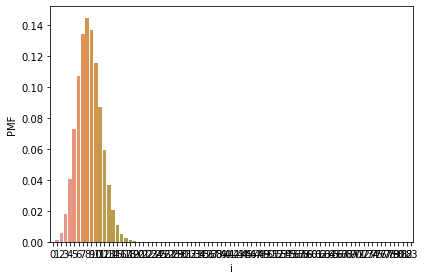

In [49]:
# по ЦПТ, при увеличении размера выборки биномиальное распределение Bin(m,t) сходится к нормальному N(mt,mtq), где q=1-t

import pandas as pd
import numpy as np
from scipy.stats import binom
import seaborn as sns
import random

# задаём исследуемую выборку
m=random.randint(0,100)
t=round(random.random(),3)

k=binom(m,t)
sample=k.rvs(size=10000)

# оцениваем неизвестные параметры
mt=np.mean(sample)
mtq=np.var(sample)
q=mtq/mt
found_t=1-q
found_m=mt/found_t
print('найденные m, t:',round(found_m,3),round(found_t,3))
print('реальные m, t:',m,t)

# иллюстрация
df = pd.DataFrame({
    "i": list(range(0, m + 1)),
    "PMF": [k.pmf(i) for i in range(0, m + 1)]
})
sns.barplot(data=df, x="i", y="PMF")
plt.tight_layout()

# 4
Используя файл breast_cancer_1000_genes.tsv, найти топ-10 наиболее постоянных генов, используя разность максимума и минимума, дисперсию и интерквартильный размах. Для каждого из трех случаев нарисовать boxplot по 10 найденным генам, интерпретировать результат.

HNRNPK      1.170144
PTBP1       1.289578
HNRNPU      1.411289
THRAP3      1.449573
HNRNPC      1.492845
             ...    
IGHA1      12.268308
IGKC       12.300272
IGHG1      12.380309
IGKV4-1    12.474497
PIP        13.402020
Name: max-min, Length: 1000, dtype: float64



(4, 9)

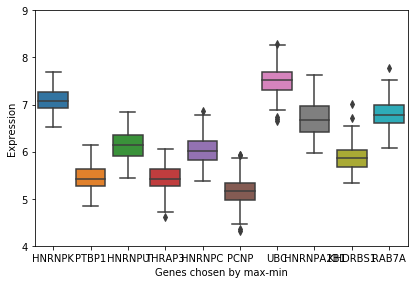

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

df = pd.read_csv("breast_cancer_1000_genes.tsv", sep="\t", index_col=0)
df['max-min']=df.max(axis=1)-df.min(axis=1)
df = df.sort_values("max-min")
print(df.iloc[:,len(df.columns)-1],end='\n\n')
df=df.iloc[:10,:len(df.columns)-1]
df=df.T

df = df.melt(var_name="Genes chosen by max-min", value_name="Expression")
sns.boxplot(x="Genes chosen by max-min", y="Expression", data=df)
plt.tight_layout()
plt.ylim(4,9)

HNRNPK      0.067682
PTBP1       0.068422
THRAP3      0.074009
SF1         0.074889
KHDRBS1     0.084905
             ...    
AGR2        7.982940
AGR3        7.984122
TFF3        8.487623
PIP        11.643411
TFF1       12.711069
Name: variance, Length: 1000, dtype: float64



(4, 9)

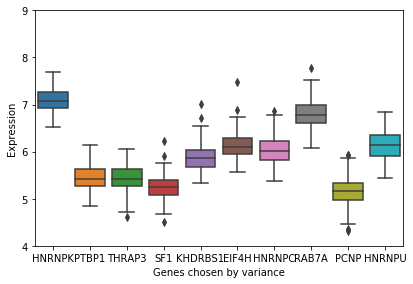

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

df = pd.read_csv("breast_cancer_1000_genes.tsv", sep="\t", index_col=0)
df['variance']=df.var(axis=1)
df = df.sort_values("variance")
print(df.iloc[:,len(df.columns)-1],end='\n\n')
df=df.iloc[:10,:len(df.columns)-1]
df=df.T

df = df.melt(var_name="Genes chosen by variance", value_name="Expression")
sns.boxplot(x="Genes chosen by variance", y="Expression", data=df)
plt.tight_layout()
plt.ylim(4,9)

SF1       0.315245
HNRNPK    0.341086
XRCC5     0.341152
EIF4H     0.346554
CNBP      0.353952
            ...   
TFF3      3.768650
IGHG1     3.956560
AGR3      4.160881
PIP       5.746339
TFF1      6.004104
Name: IQR, Length: 1000, dtype: float64



(4, 9)

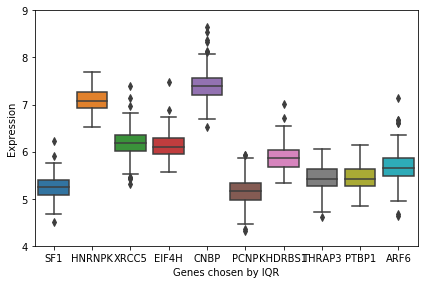

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

df = pd.read_csv("breast_cancer_1000_genes.tsv", sep="\t", index_col=0)
df['IQR']=df.quantile(q=0.75, axis=1)-df.quantile(q=0.25, axis=1)
df = df.sort_values("IQR")
print(df.iloc[:,len(df.columns)-1],end='\n\n')
df=df.iloc[:10,:len(df.columns)-1]
df=df.T

df = df.melt(var_name="Genes chosen by IQR", value_name="Expression")
sns.boxplot(x="Genes chosen by IQR", y="Expression", data=df)
plt.tight_layout()
plt.ylim(4,9)

# 5
Используя файл breast_cancer_key_genes.tsv, нарисовать совместный kdeplot для генов ESR1 и PGR в выборке опухолей молочной железы. Выделить и охарактеризовать три подгруппы пациентов.

x=ESR1, y=PGR


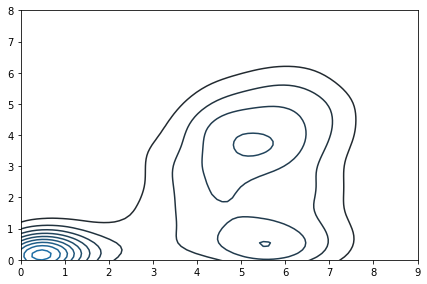

In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

df = pd.read_csv("breast_cancer_key_genes.tsv", sep="\t", index_col=0)
df=df.loc[:,['ESR1','PGR']]
sns.kdeplot(data=df)
plt.tight_layout()
plt.xlim(0,9)
plt.ylim(0,8)
print('x=ESR1, y=PGR')